In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv('/kaggle/input/bidask/bidAsk.csv')

/kaggle/input/bidask/bidAsk.csv


<Axes: xlabel='spread', ylabel='mktcap'>

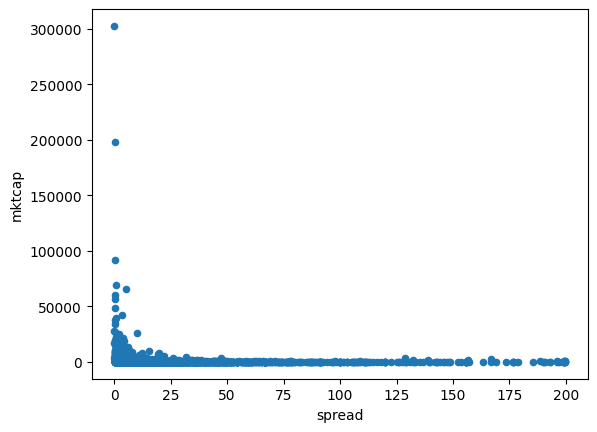

In [59]:
df.plot(x='spread', y='mktcap', kind='scatter')

This graph makes no sense and is really boring. I guess the only thing it tells us is that there is some Indian company with a high market cap and low spread. Probably something like Tata. 

*This next scentence is some boring justification for what the data can tell us in our decision making for next steps in our analysis*

We can see that the data looks difficult to work with when we use standard scaling. We have large outliers and we can see that the scale is very sensitive. Basically, fo a small change in market cap the spread the spread could vary across the entire range in our data set. 

Now that we answered question 1a. Let us take a look at the correlation coefficients and answer question 1b. 

          mktcap    spread
mktcap  1.000000 -0.068298
spread -0.068298  1.000000


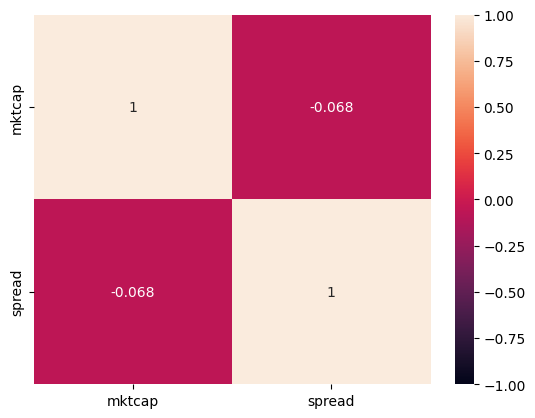

In [53]:
corr = df.corr()
print(corr)
ax = sns.heatmap(df.corr(), vmin= -1, vmax = 1, annot=True)

We see that the correlation coefficients are very close to zero. This indicates that the variables are not correlated at all. There is a slight negative correlation, but it is negligible and for all intents and purposes. It can be considered as uncorrelated.

Basically the idea of correlation is that the closer the value is to 1. The greater the positive correlation. 
The closer the value is to -1. The greater the negative correlation. 
A value of 0 just means it is uncorrelated.

That is why we see the value of 1. Spread is obviously highly correlated to itself. 

But, this is a homework assignment so they wouldn't give us uncorrelated data right? Let us look at the next homework question for clues on what we should do. 

It tells us to use something called a log transformation! Wow! 

I did a quick google about it and wrote a boring paragraph on what it is.



We can apply a logarithmic scale to normalize the data, and allow us to make better sense of the outputs. 

As this website [website](www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/#:~:text=The%20log%20transformation%20is%2C%20arguably,normal%20or%20near%20normal%20distribution) explains, 
> Quite often data arising in real studies are so skewed that standard statistical analyses of these data yield invalid results. Many methods have been developed to test the normality assumption of observed data. When the distribution of the continuous data is non-normal, transformations of data are applied to make the data as "normal" as possible and, thus, increase the validity of the associated statistical analyses. The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution. In this case, the log-transformation does remove or reduce skewness.

Let us see what correlations and scatter plot we receive when we apply a loglog transformation. (Basically, there are 4 variations. The linear-linear one shown above, a linear-log one where the log is only applied to independent variables, a log-linear where the logarithm is applied to the output Y, and finally, the one being used here, the log-log where both the inputs and output are being logarithmically transformed.

I also found some boring pdf file from a university in London that goes over it in greater detail! Yay!



Okay, so now let us take a look into how the data changes once we apply a log-log transformation.

(Funny enough, the pandas library can plot it for you. It just doesn't change the dataframes columns like we need it to do for the correlation matrix)
(Uncomment the code below if you are curious)


<Axes: xlabel='spread', ylabel='mktcap'>

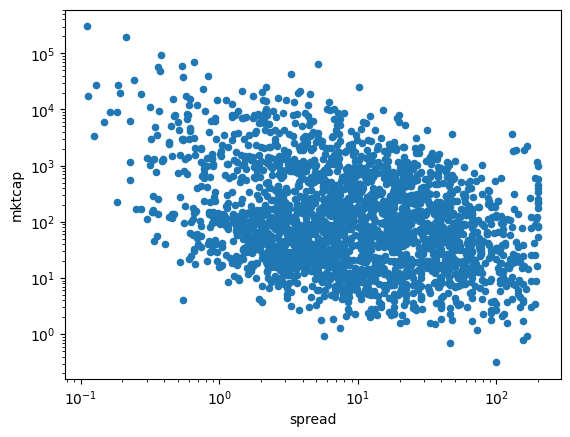

In [57]:
#df.plot(x='spread', y='mktcap', kind='scatter', loglog=True)

            log2spread  log2mktcap
log2spread    1.000000   -0.305502
log2mktcap   -0.305502    1.000000


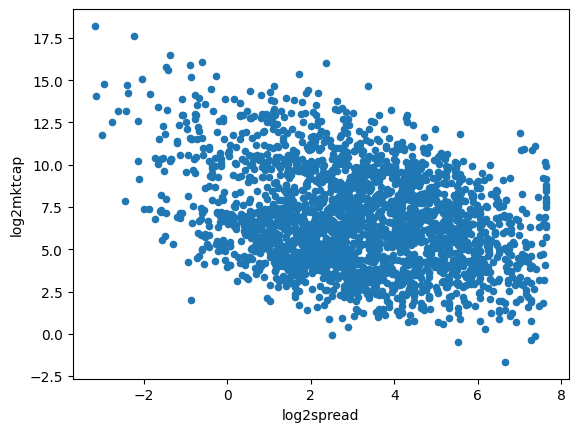

In [44]:
dfLog = pd.DataFrame()

#Here we are applying log2 to each variable in the column
dfLog['log2spread'] = np.log2(df['spread'])
dfLog['log2mktcap'] = np.log2(df['mktcap'])

dfLog.plot(x='log2spread', y='log2mktcap', kind='scatter')


Okay! Looks like we are getting somewhere with our fancy new log spread. Umm... you can choose either choose the natural log (base2) or you can choose the base10 log. I chose base2, but idk what your professor would prefer. I think they look the same anyways, but still double check. 

Cool! Umm... Yea we can see the data is clustered around a log2spread of 2-6 and a log2mktCap of 2.5-7.5. 

So I have no idea what any of that means, but that pdf talks about percent changes for the variables so based on what I have read it means something along the lines of if the log2spread is a value of 3 and that data point's corresponding log2mktcap is 7 then that means that if the spread changes by 3% then the market cap will change by 7%. 

Cool now that we have that out of the way... Let's talk about correlation matrixes again! WOOOO! (I wish I could use gifs in jupyter notebooks)

            log2spread  log2mktcap
log2spread    1.000000   -0.305502
log2mktcap   -0.305502    1.000000


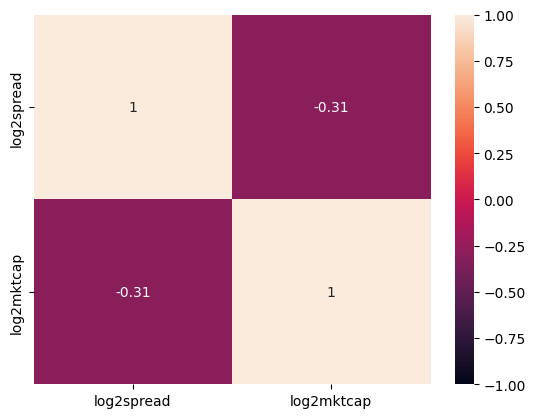

In [55]:
corr = dfLog.corr()
print(corr)
ax = sns.heatmap(dfLog.corr(), vmin= -1, vmax = 1, annot=True)

Alrighty, taking a look at this correlation matrix we are now seeing that the variables have a mild negative correlation! Nice! 

Because the log values are percent changes rather that hard values. We are able to see the more sensitive changes in the data, and this has an effect on correlation.


Cool, time to take the data and run a regression. It may look weird in python, but it will be fine. 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


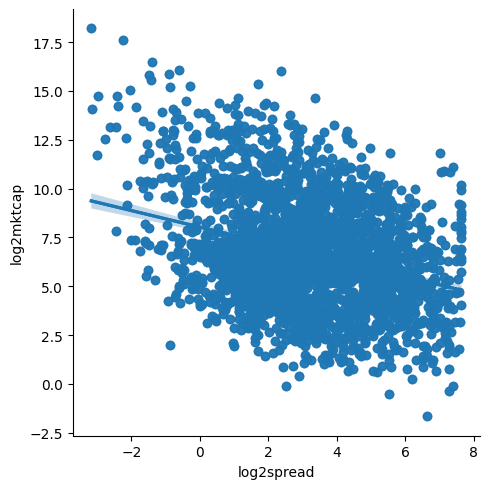

In [62]:
sns.lmplot(x="log2spread", y="log2mktcap", data=dfLog);
sns.regplot(x="log2spread", y="log2mktcap", data=dfLog);

The coefficient of determination of the prediction (R^2 value): 0.114315343675234
The coefficient of determination of the prediction (R^2 value): [[-0.40091472]]


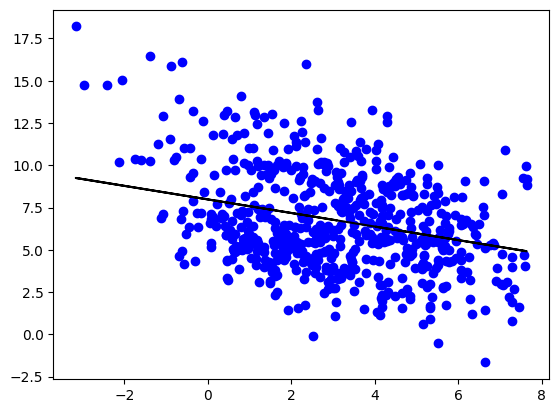

In [74]:
X = np.array(dfLog['log2spread']).reshape(-1, 1)
y = np.array(dfLog['log2mktcap']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
 
regr.fit(X_train, y_train )
print('The coefficient of determination of the prediction (R^2 value):', regr.score(X_test, y_test))
print('Array representation of the b value:', regr.coef_)

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
 
plt.show()

Here we do the same pattern that all predictive models do. We split the data up into test and train datasets. Then train the model to get the predictive coefficients.

Recall that a linear regression takes the form of 

Y = (b1)X1 + (b2)X2 + (b3)X3 + .... + (bn)Xn

In our example it is a single independent variable so our equation looks like

Y = (b1)X1 

But, remember we used the log-log transformation so it actually looks like

log(Y) = (b1)log(X1)

In our output we see the b1 value as something like "-0.40091472" which is consistent with our correlation coefficient. This is due to the mild negative correlation that is being shown. 

1e and 1d sound hard. Let me take a shot at it though. I think I can do it!



In [109]:

#qcut in pandas will slice them into quantile buckets. 4 means 4 buckets with equal amounts so the data is roughly 25% in each bucket.
#dfLog['segSpread'] = pd.qcut(x=dfLog['log2spread'],q=4) 
#dfLog['segMktcap'] = pd.qcut(x=dfLog['log2mktcap'],q=4)
dfLog['segSpread'] = pd.qcut(x=dfLog['log2spread'],q=4, labels=[1,2,3,4]) 
dfLog['segMktcap'] = pd.qcut(x=dfLog['log2mktcap'],q=4, labels=[1,2,3,4])

print(dfLog.segSpread.value_counts())
print('')
print(dfLog.segMktcap.value_counts())


segSpread
1    618
2    618
4    616
3    612
Name: count, dtype: int64

segMktcap
1    617
3    616
4    616
2    615
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


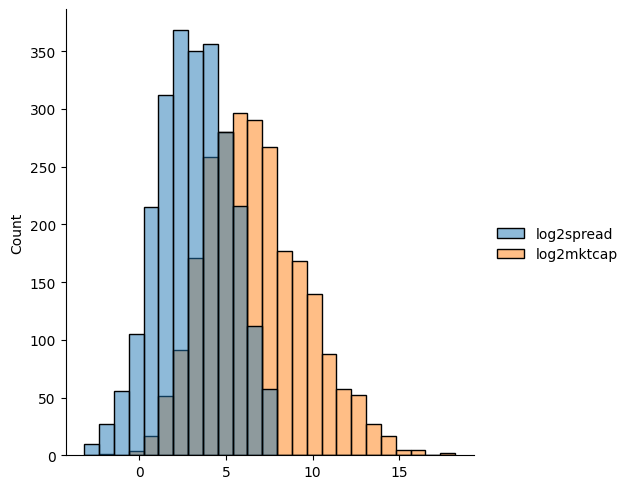

In [98]:
sns.displot(dfLog, bins=25, ax=ax)

This makes no sense so I need to see if what I am thinking is what I am seeing. 
One second while I write a ton of random code that I may or may not take the time to explain...

[4, 2, 3, 1]
Categories (4, int64): [1 < 2 < 3 < 4]


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_32/172355255.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


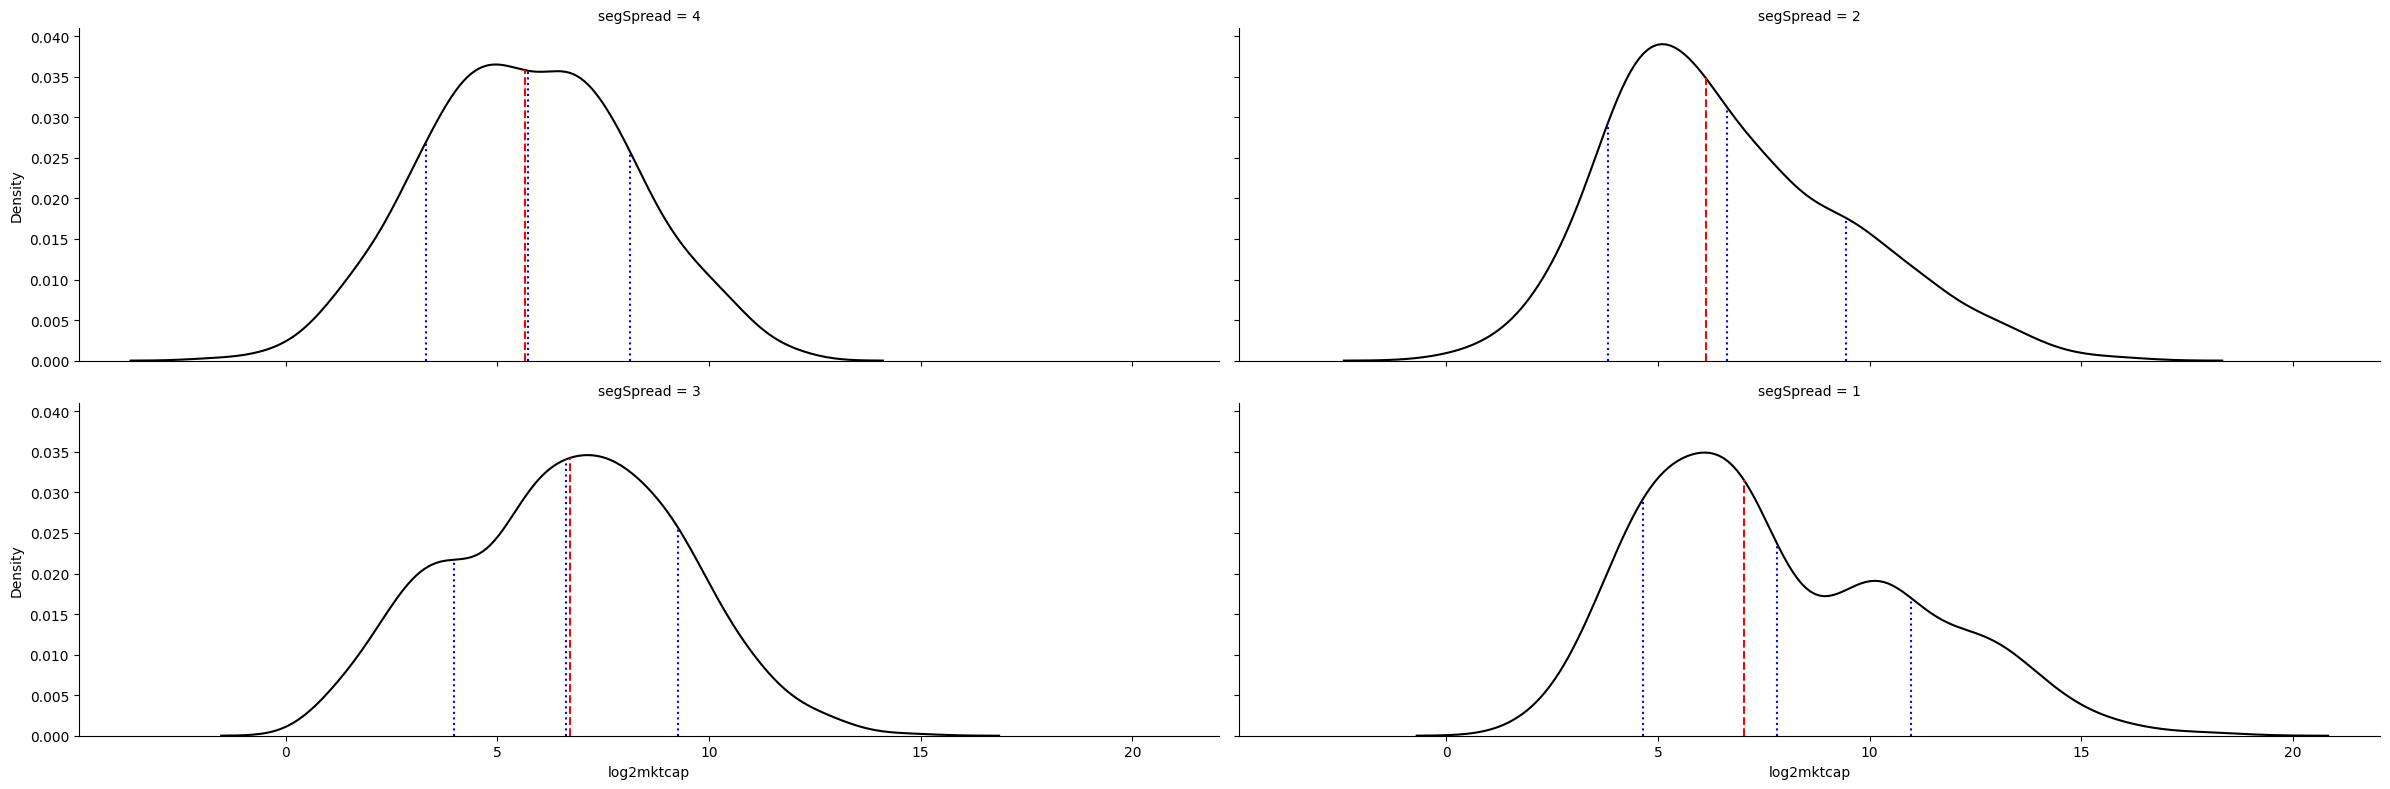

In [114]:
segSpreadBuckets = dfLog['segSpread'].unique()
print(segSpreadBuckets)

g = sns.displot( kind='kde', data=dfLog, x='log2mktcap',
                 col='segSpread', col_order=segSpreadBuckets, col_wrap=2,
                 height=4, aspect=3, color='black')
for spreadBucket,ax in g.axes_dict.items():
    data = dfLog[dfLog['segSpread'] == spreadBucket]['log2mktcap'].values
    xs, ys = ax.get_lines()[0].get_data()
    median = np.median(data)
    mean = data.mean()
    sdev = data.std()
    ax.vlines([mean-sdev, mean, mean+sdev], 0, np.interp([mean-sdev, mean, mean+sdev], xs, ys), color='b', ls=':')
    ax.vlines(median, 0, np.interp(median, xs, ys), color='r', ls='--')
plt.tight_layout()
plt.show()

These 4 distribution graphs are the distribution of log(mktcap) values in each bucket. 

<Axes: xlabel='log2mktcap', ylabel='Density'>

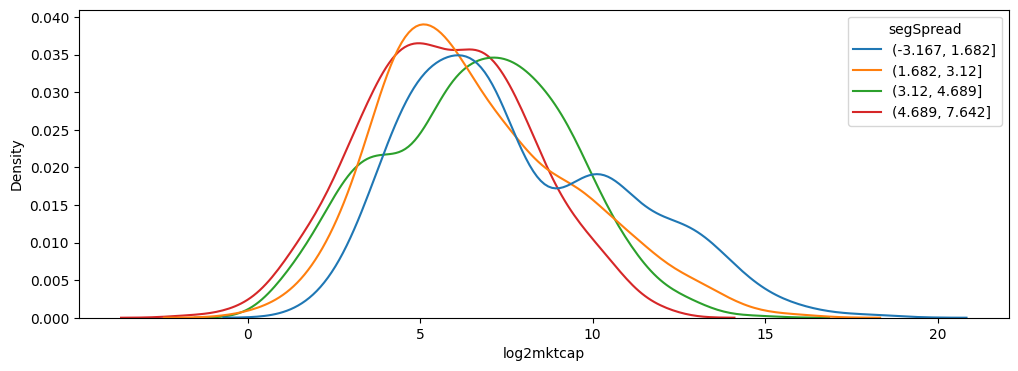

In [105]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.kdeplot(data=dfLog, x='log2mktcap', hue='segSpread', ax=ax)

This is all of them stacked on top of each other. But I am no closer to answering the question. :)

But if I had to make some sort of argument here. I would say that the distributions are scaled more to the left of the entire range.

I actually had to do some digging to understand this, but depending on how badly a graph is skewed affect how correlated they are. So the fact the values are slightly skewed indicate that the correlation is not quite as it would be during a symmetrical distribution. In a theoretical world, this means the date can be further refined and improved. 

I will include a PDF that gave me this conclusion. 